## **Predict winners in CS:GO with Keras [80%]**


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/csgo_round_snapshots.csv')

In [4]:
y = df.round_winner
X = df.drop(['round_winner'], axis=1)

cols_grenade = 'grenade'
X = X.drop(X.columns[X.columns.str.contains(cols_grenade)], axis=1)

print(f"Total number of samples: {len(X)}")

X.head()

Total number of samples: 122410


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
sample_index = 25
print(df.iloc[sample_index])

time_left                       54.97
ct_score                          3.0
t_score                           1.0
map                          de_dust2
bomb_planted                    False
                               ...   
ct_grenade_molotovgrenade         0.0
t_grenade_molotovgrenade          0.0
ct_grenade_decoygrenade           0.0
t_grenade_decoygrenade            0.0
round_winner                        T
Name: 25, Length: 97, dtype: object


## **EDA**

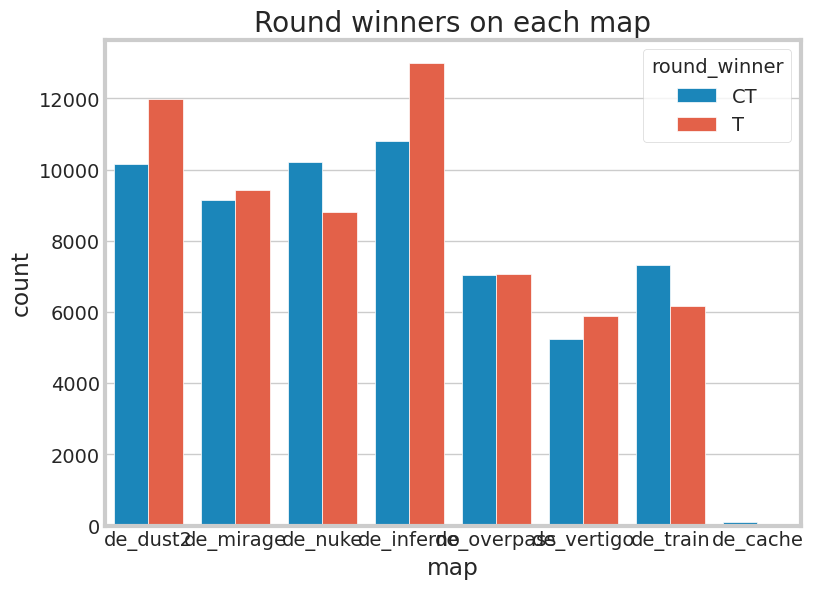

In [6]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=df)
ax.set(title='Round winners on each map')
plt.show()

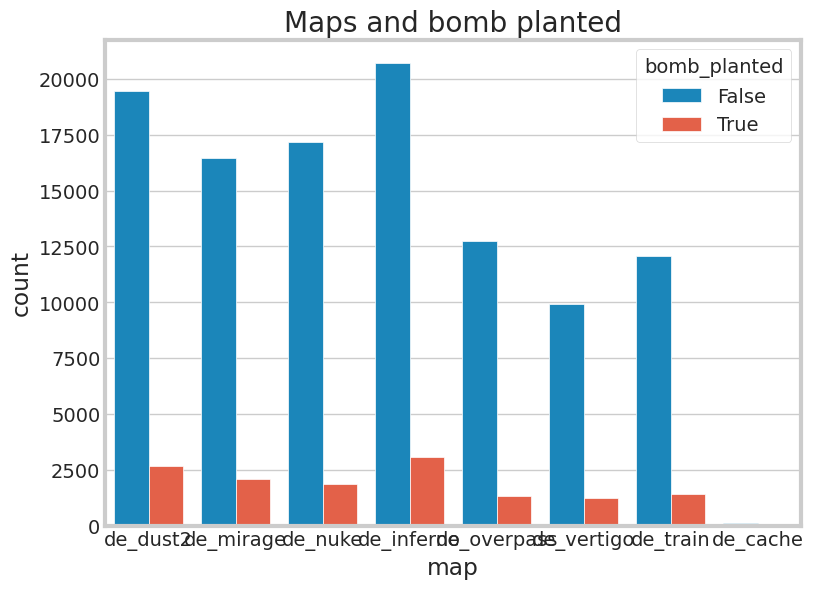

In [7]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df)
ax.set(title='Maps and bomb planted')
plt.show()

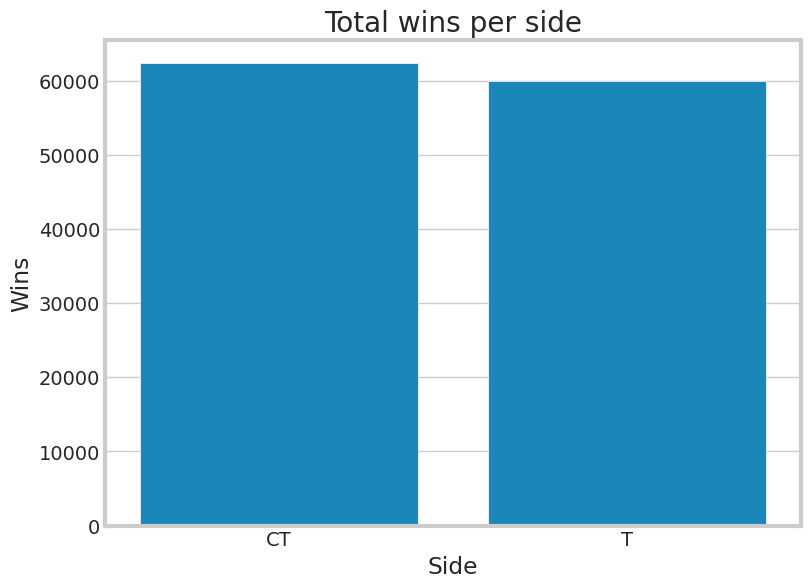

In [8]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['round_winner'].unique(), y=df['round_winner'].value_counts())
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

<ipython-input-9-73f95a626e78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ct_health'], bins=10, ax=ax1);
<ipython-input-9-73f95a626e78>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['t_health'], bins=10, ax=ax2);


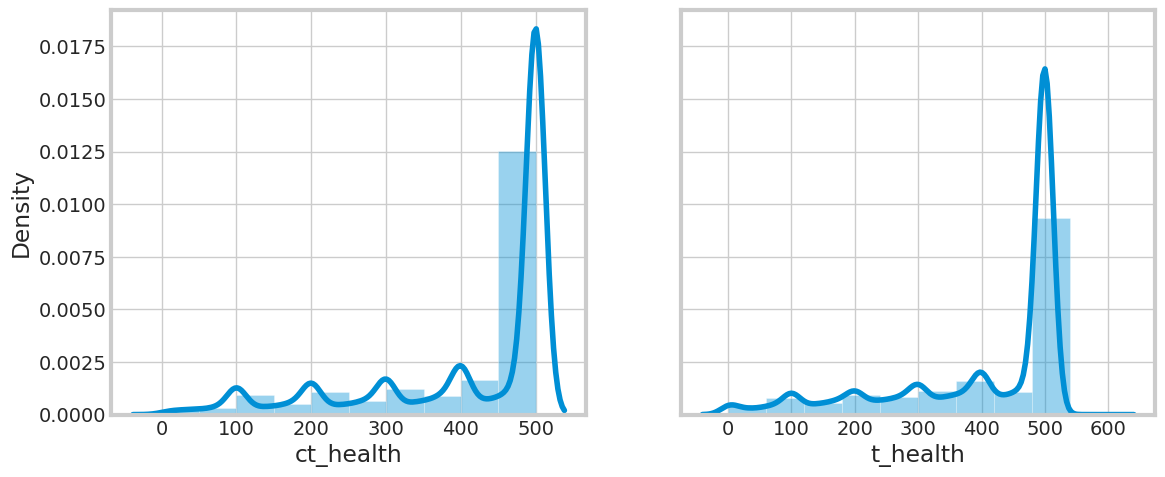

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_health'], bins=10, ax=ax1);
sns.distplot(df['t_health'], bins=10, ax=ax2);

<ipython-input-10-bea3ef835752>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ct_money'], bins=10, ax=ax1);
<ipython-input-10-bea3ef835752>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['t_money'], bins=10, ax=ax2);


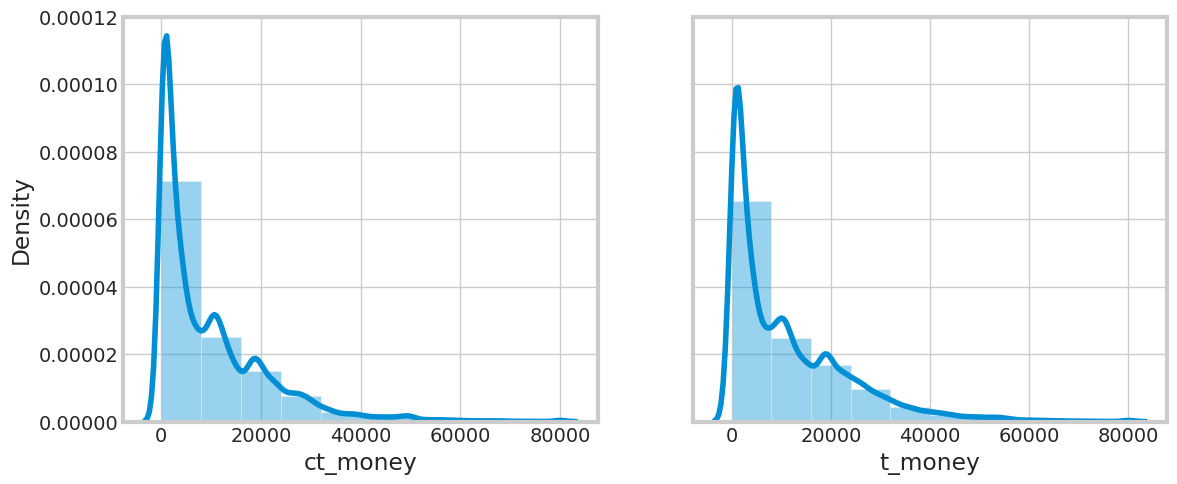

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_money'], bins=10, ax=ax1);
sns.distplot(df['t_money'], bins=10, ax=ax2);

<ipython-input-11-470c64a36e7a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ct_score'], shade=True, ax=ax1)
<ipython-input-11-470c64a36e7a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['t_score'], shade=True, ax=ax2)


<Axes: xlabel='t_score', ylabel='Density'>

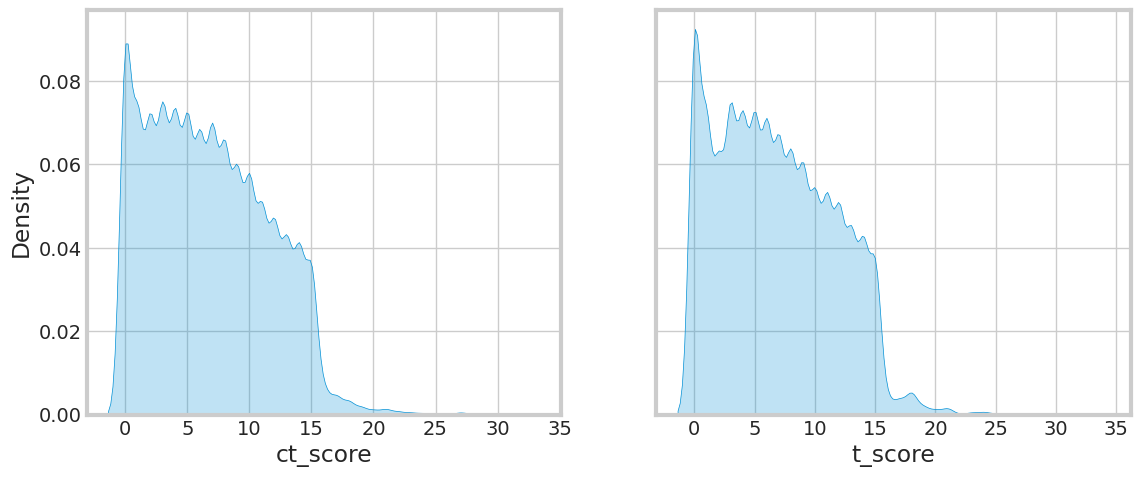

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.kdeplot(df['ct_score'], shade=True, ax=ax1)
sns.kdeplot(df['t_score'], shade=True, ax=ax2)

<ipython-input-12-25f4fe82b8eb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['time_left'], shade=True)


<Axes: xlabel='time_left', ylabel='Density'>

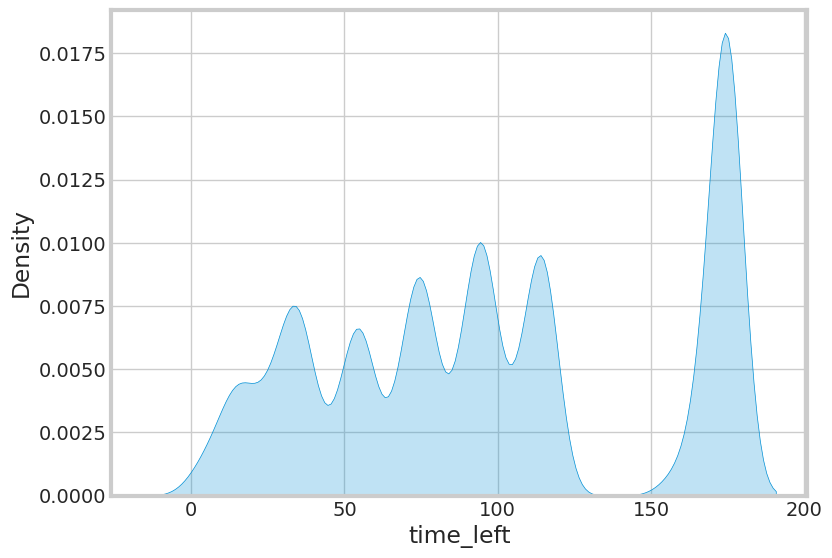

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['time_left'], shade=True)

## **Feature encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import power_transform

def encode_targets(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y_encoded = encoder.transform(y)
    return y_encoded

def encode_inputs(X, object_cols):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_encoded = pd.DataFrame(ohe.fit_transform(X[object_cols]))
    X_encoded.columns = ohe.get_feature_names_out(object_cols)
    X_encoded.index = X.index
    return X_encoded

def yeo_johnson(series):
    arr = np.array(series).reshape(-1, 1)
    return power_transform(arr, method='yeo-johnson')

object_cols = ['map', 'bomb_planted']
X_encoded = encode_inputs(X, object_cols)
numerical_X = X.drop(object_cols, axis=1)
X = pd.concat([numerical_X, X_encoded], axis=1)

y = encode_targets(y)

cols = ['time_left', 'ct_money', 't_money', 'ct_health',
 't_health', 'ct_armor', 't_armor', 'ct_helmets', 't_helmets',
  'ct_defuse_kits', 'ct_players_alive', 't_players_alive']
for col in cols:
    X[col] = yeo_johnson(X[col])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **Keras DNN model**

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
 stratify=y, test_size=0.1, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
 stratify=y_train_full, test_size=0.25, random_state=0)

n_layers = 4
n_nodes = 300
regularized = False
dropout = True
epochs = 50

model = keras.models.Sequential()
model.add(keras.layers.BatchNormalization())
for n in range(n_layers):
    if regularized:
        model.add(keras.layers.Dense(n_nodes, kernel_initializer="he_normal",
         kernel_regularizer=keras.regularizers.l1(0.01), use_bias=False))
    else:
        model.add(keras.layers.Dense(n_nodes,
         kernel_initializer="he_normal", use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.001)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model.fit(np.array(X_train), np.array(y_train), epochs=epochs,
     validation_data=(np.array(X_valid), np.array(y_valid)),
      callbacks=[reduce_lr_cb, early_stopping_cb], batch_size=128)

Epoch 1/50
646/646 [==============================] - 18s 20ms/step - loss: 0.5034 - accuracy: 0.7320 - val_loss: 0.4616 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 2/50
646/646 [==============================] - 13s 21ms/step - loss: 0.4743 - accuracy: 0.7450 - val_loss: 0.4609 - val_accuracy: 0.7553 - lr: 0.0010
Epoch 3/50
646/646 [==============================] - 13s 20ms/step - loss: 0.4688 - accuracy: 0.7469 - val_loss: 0.4582 - val_accuracy: 0.7567 - lr: 0.0010
Epoch 4/50
646/646 [==============================] - 14s 21ms/step - loss: 0.4645 - accuracy: 0.7513 - val_loss: 0.4582 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 5/50
646/646 [==============================] - 13s 20ms/step - loss: 0.4612 - accuracy: 0.7510 - val_loss: 0.4523 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 6/50
646/646 [==============================] - 13s 20ms/step - loss: 0.4579 - accuracy: 0.7544 - val_loss: 0.4525 - val_accuracy: 0.7590 - lr: 0.0010
Epoch 7/50
646/646 [==============================] - 13s 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 92)                368       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               27600     
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               9

## **Evaluation**

In [19]:
model.evaluate(X_test, y_test)

383/383 [==============================] - 2s 6ms/step - loss: 0.3873 - accuracy: 0.8075


[0.38732054829597473, 0.8074503540992737]

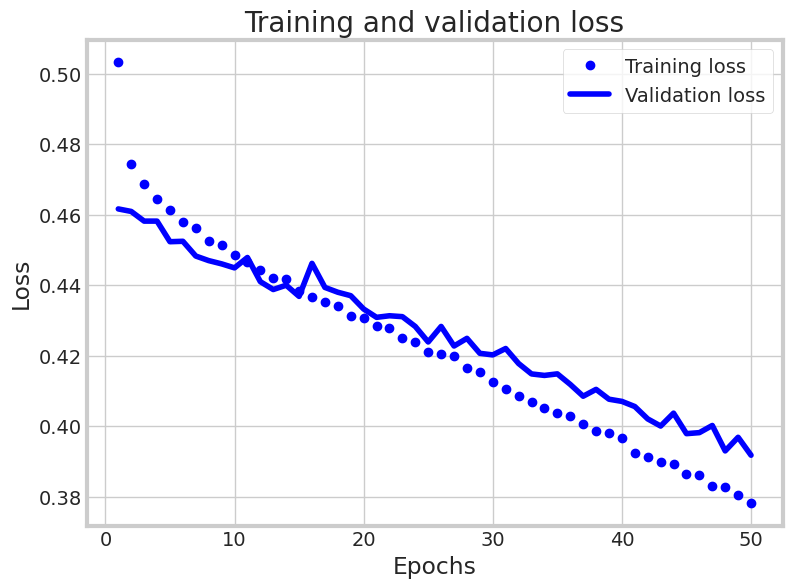

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

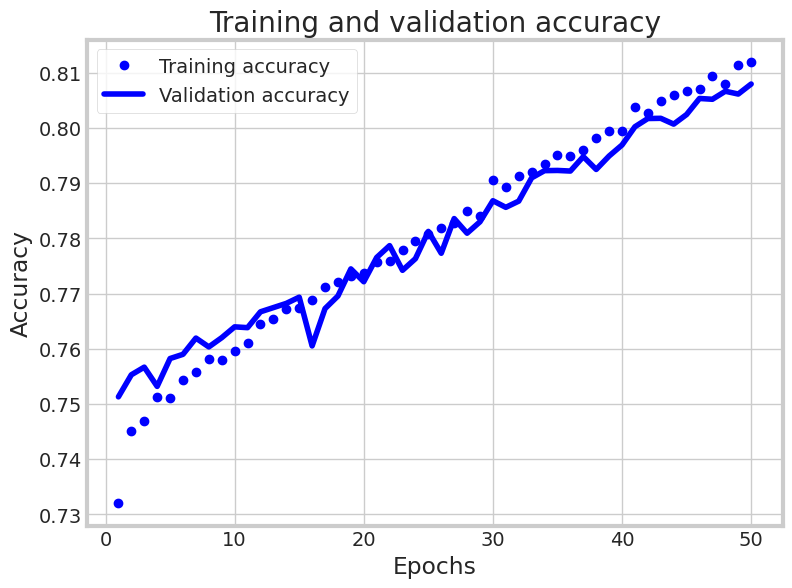

In [21]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
X_new = X_test[:10]
y_pred_prob = model.predict(X_new)
y_pred = np.argmax(y_pred_prob, axis=1)
class_names = ['CT', 'T']
np.array(class_names)[y_pred]

1/1 [==============================] - 1s 1s/step


array(['CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT'],
      dtype='<U2')

In [24]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 25ms/step


array([[1.  ],
       [0.99],
       [0.5 ],
       [0.42],
       [0.5 ],
       [0.26],
       [1.  ],
       [0.5 ],
       [0.99],
       [0.88]], dtype=float32)